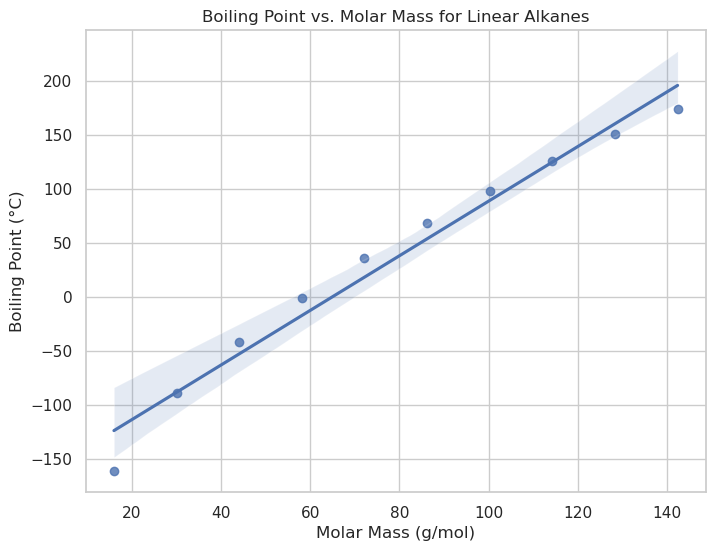

In [1]:
import pandas as pd

alkanes = pd.DataFrame({
    "Alkane": ["Methane", "Ethane", "Propane", "Butane", "Pentane",
               "Hexane", "Heptane", "Octane", "Nonane", "Decane"],
    "Carbons": list(range(1, 11)),
    "MolarMass": [16.04, 30.07, 44.10, 58.12, 72.15,
                  86.18, 100.21, 114.23, 128.26, 142.29],
    "BoilingPoint": [-161.5, -88.6, -42.1, -0.5, 36.1,
                     68.7, 98.4, 125.6, 150.8, 174.1]
})

import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="whitegrid")

# Regression plot: Boiling Point vs. Molar Mass
plt.figure(figsize=(8, 6))
sns.regplot(data=alkanes, x="MolarMass", y="BoilingPoint")

plt.title("Boiling Point vs. Molar Mass for Linear Alkanes")
plt.xlabel("Molar Mass (g/mol)")
plt.ylabel("Boiling Point (°C)")
plt.show()


In [2]:
from scipy.stats import linregress

# Extract x and y data from your DataFrame
x = alkanes["MolarMass"]
y = alkanes["BoilingPoint"]

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(x, y)

# Print slope and intercept
print(f"Slope: {slope:.3f}")
print(f"Intercept: {intercept:.3f}")
print(f"R²: {r_value**2:.3f}")
print(f"p value: {p_value**2:.3f}, if p value <0.05 slope is statistically significant")
print(f"std_err: {std_err**2:.3f}, (smaller the better)")


Slope: 2.534
Intercept: -164.469
R²: 0.972
p value: 0.000, if p value <0.05 slope is statistically significant
std_err: 0.023, (smaller the better)


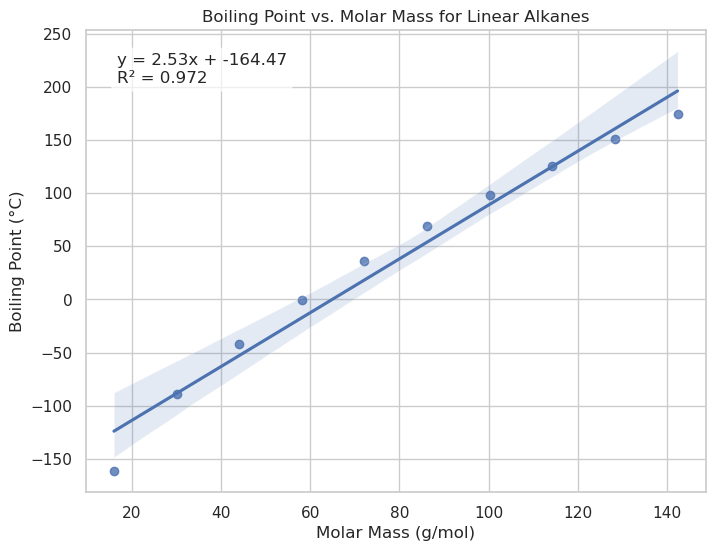

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
plt.figure(figsize=(8, 6))
ax = sns.regplot(x=x, y=y)

# Annotate with equation
equation = f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.3f}"
ax.text(0.05, 0.95, equation, transform=ax.transAxes,
        fontsize=12, verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.7))

# Labels
ax.set_title("Boiling Point vs. Molar Mass for Linear Alkanes")
ax.set_xlabel("Molar Mass (g/mol)")
ax.set_ylabel("Boiling Point (°C)")

plt.show()


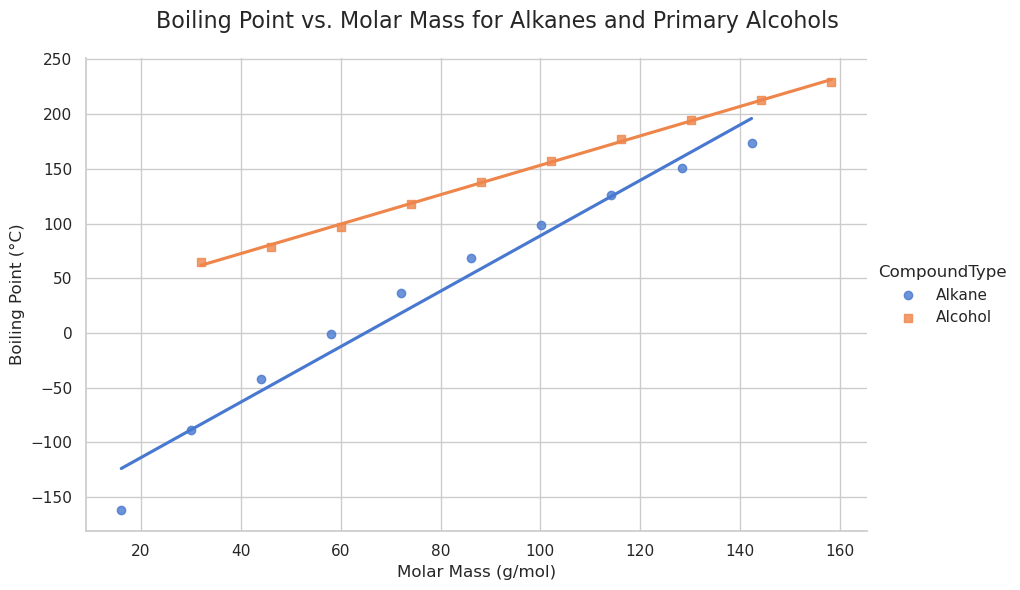

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Data preparation
data = {
    'CarbonAtoms': list(range(1, 11)) * 2,
    'MolarMass': [16.04, 30.07, 44.10, 58.12, 72.15, 86.18, 100.21, 114.23, 128.26, 142.29,
                  32.04, 46.07, 60.10, 74.12, 88.15, 102.18, 116.21, 130.23, 144.26, 158.29],
    'BoilingPoint': [-161.5, -88.6, -42.1, -0.5, 36.1, 68.7, 98.4, 125.7, 150.8, 174.0,
                     64.7, 78.4, 97.0, 117.7, 137.9, 157.5, 176.9, 195.0, 212.6, 229.7],
    'CompoundType': ['Alkane'] * 10 + ['Alcohol'] * 10
}

df = pd.DataFrame(data)

# Plotting
sns.set_theme(style="whitegrid")
g = sns.lmplot(
    data=df,
    x='MolarMass',
    y='BoilingPoint',
    hue='CompoundType',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette='muted',
    ci=None
)

# Titles and labels
g.set_axis_labels('Molar Mass (g/mol)', 'Boiling Point (°C)')
g.fig.suptitle('Boiling Point vs. Molar Mass for Alkanes and Primary Alcohols', fontsize=16)
plt.subplots_adjust(top=0.9)

# Show plot
plt.show()


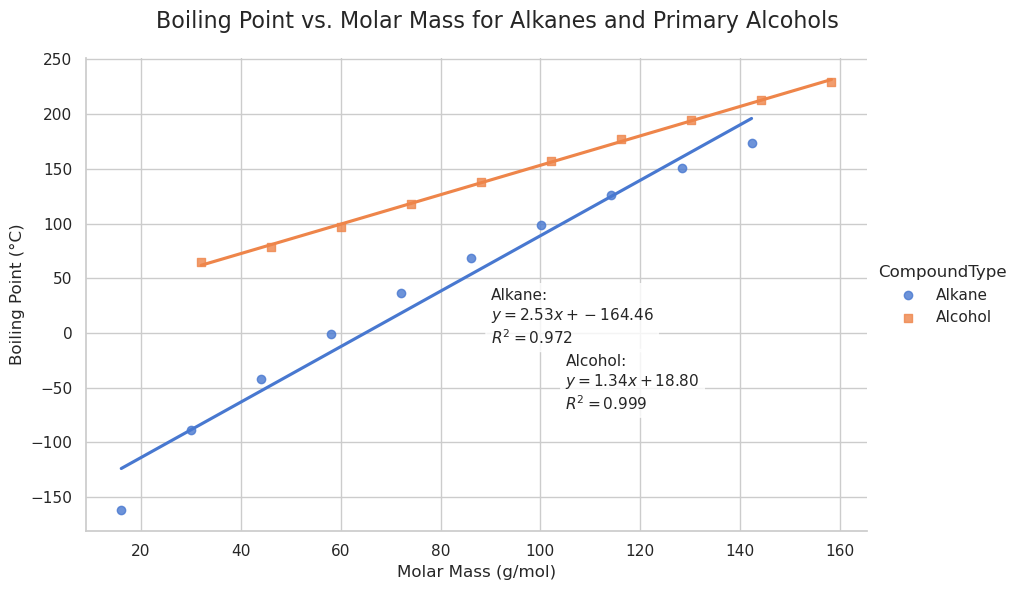

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Prepare the data
data = {
    'CarbonAtoms': list(range(1, 11)) * 2,
    'MolarMass': [16.04, 30.07, 44.10, 58.12, 72.15, 86.18, 100.21, 114.23, 128.26, 142.29,
                  32.04, 46.07, 60.10, 74.12, 88.15, 102.18, 116.21, 130.23, 144.26, 158.29],
    'BoilingPoint': [-161.5, -88.6, -42.1, -0.5, 36.1, 68.7, 98.4, 125.7, 150.8, 174.0,
                     64.7, 78.4, 97.0, 117.7, 137.9, 157.5, 176.9, 195.0, 212.6, 229.7],
    'CompoundType': ['Alkane'] * 10 + ['Alcohol'] * 10
}

df = pd.DataFrame(data)

# Perform regression analysis for each compound type
results = {}
for compound in ['Alkane', 'Alcohol']:
    subset = df[df['CompoundType'] == compound]
    slope, intercept, r_value, p_value, std_err = linregress(subset['MolarMass'], subset['BoilingPoint'])
    results[compound] = {
        'slope': slope,
        'intercept': intercept,
        'r_squared': r_value**2
    }

# Create the plot
sns.set_theme(style="whitegrid")
g = sns.lmplot(
    data=df,
    x='MolarMass',
    y='BoilingPoint',
    hue='CompoundType',
    height=6,
    aspect=1.5,
    markers=['o', 's'],
    palette='muted',
    ci=None
)

# Annotate regression equations
ax = g.ax  # Get the Matplotlib Axes object
text_y = {
    'Alkane': -10,
    'Alcohol': -70
}
for compound, res in results.items():
    label = f"{compound}:\n$y = {res['slope']:.2f}x + {res['intercept']:.2f}$\n$R^2 = {res['r_squared']:.3f}$"
    x_pos = 90 if compound == "Alkane" else 105
    ax.text(x_pos, text_y[compound], label, fontsize=11, bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

# Final plot tweaks
g.set_axis_labels('Molar Mass (g/mol)', 'Boiling Point (°C)')
g.fig.suptitle('Boiling Point vs. Molar Mass for Alkanes and Primary Alcohols', fontsize=16)
plt.subplots_adjust(top=0.9)
plt.show()


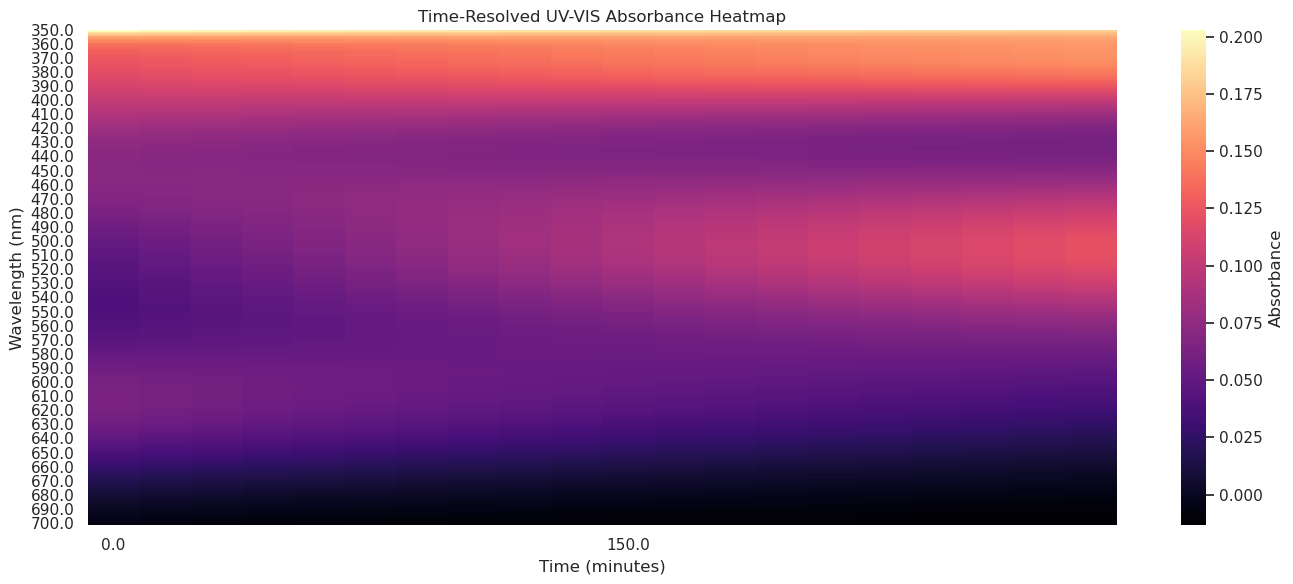

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Set path to your aquation.csv file
aquation_csv_datapath = os.path.expanduser("~/data/spectra/aquation.csv")

# Step 1: Load the CSV
df = pd.read_csv(aquation_csv_datapath)

# Step 2: Promote first row to column headers (time values in minutes)
df.columns = df.iloc[0]
df = df.drop(index=0)

# Step 3: Rename first column to "Wavelength" and set it as index
df = df.rename(columns={df.columns[0]: "Wavelength"})
df.set_index("Wavelength", inplace=True)

# Step 4: Convert all values to numeric (in case of any formatting issues)
df = df.apply(pd.to_numeric, errors='coerce')

# Optional: Sort index just in case
df.index = df.index.astype(float)
df = df.sort_index()

# Step 5: Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    df,
    cmap="magma",
    cbar_kws={'label': 'Absorbance'},
    xticklabels=10,  # Show every 10th time point on x-axis
    yticklabels=10   # Show every 10th wavelength on y-axis
)

plt.title("Time-Resolved UV-VIS Absorbance Heatmap")
plt.xlabel("Time (minutes)")
plt.ylabel("Wavelength (nm)")
plt.tight_layout()
plt.show()


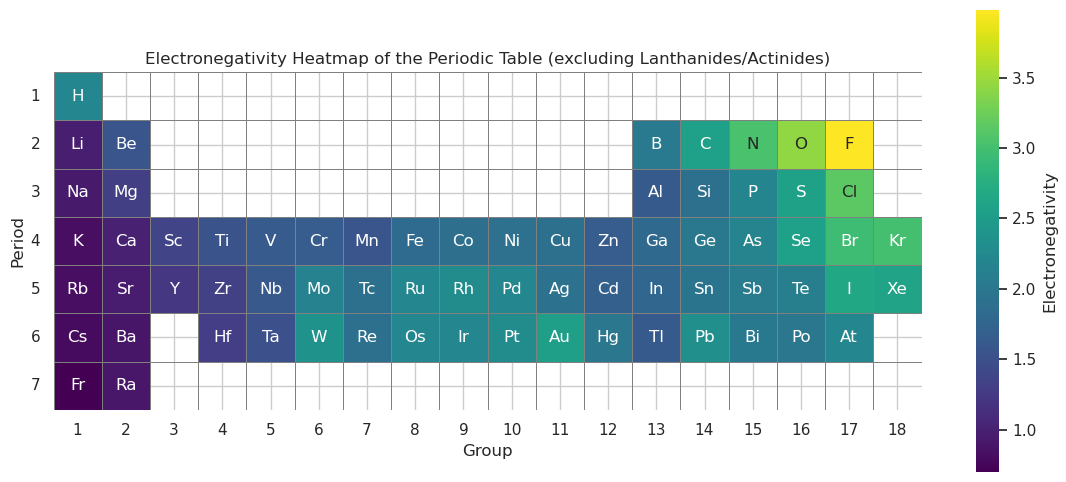

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

# Load PubChem periodic table data
periodictable_csv_datapath = os.path.expanduser("~/data/pubchem_data/PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath)

# Build periodic table layout (main group + transition elements)
pt_layout = [
    # Period 1
    (1, 1, "H"), (2, 18, "He"),
    # Period 2
    (3, 1, "Li"), (4, 2, "Be"), (5, 13, "B"), (6, 14, "C"), (7, 15, "N"), (8, 16, "O"), (9, 17, "F"), (10, 18, "Ne"),
    # Period 3
    (11, 1, "Na"), (12, 2, "Mg"), (13, 13, "Al"), (14, 14, "Si"), (15, 15, "P"), (16, 16, "S"), (17, 17, "Cl"), (18, 18, "Ar"),
    # Period 4
    (19, 1, "K"), (20, 2, "Ca"), (21, 3, "Sc"), (22, 4, "Ti"), (23, 5, "V"), (24, 6, "Cr"), (25, 7, "Mn"), (26, 8, "Fe"),
    (27, 9, "Co"), (28, 10, "Ni"), (29, 11, "Cu"), (30, 12, "Zn"), (31, 13, "Ga"), (32, 14, "Ge"), (33, 15, "As"),
    (34, 16, "Se"), (35, 17, "Br"), (36, 18, "Kr"),
    # Period 5
    (37, 1, "Rb"), (38, 2, "Sr"), (39, 3, "Y"), (40, 4, "Zr"), (41, 5, "Nb"), (42, 6, "Mo"), (43, 7, "Tc"), (44, 8, "Ru"),
    (45, 9, "Rh"), (46, 10, "Pd"), (47, 11, "Ag"), (48, 12, "Cd"), (49, 13, "In"), (50, 14, "Sn"), (51, 15, "Sb"),
    (52, 16, "Te"), (53, 17, "I"), (54, 18, "Xe"),
    # Period 6 (no lanthanides)
    (55, 1, "Cs"), (56, 2, "Ba"), (72, 4, "Hf"), (73, 5, "Ta"), (74, 6, "W"), (75, 7, "Re"), (76, 8, "Os"),
    (77, 9, "Ir"), (78, 10, "Pt"), (79, 11, "Au"), (80, 12, "Hg"), (81, 13, "Tl"), (82, 14, "Pb"), (83, 15, "Bi"),
    (84, 16, "Po"), (85, 17, "At"), (86, 18, "Rn"),
    # Period 7 (no actinides)
    (87, 1, "Fr"), (88, 2, "Ra"), (104, 4, "Rf"), (105, 5, "Db"), (106, 6, "Sg"), (107, 7, "Bh"), (108, 8, "Hs"),
    (109, 9, "Mt"), (110, 10, "Ds"), (111, 11, "Rg"), (112, 12, "Cn"), (113, 13, "Nh"), (114, 14, "Fl"),
    (115, 15, "Mc"), (116, 16, "Lv"), (117, 17, "Ts"), (118, 18, "Og")
]

# Create layout DataFrame
template_df = pd.DataFrame(pt_layout, columns=["AtomicNumber", "Group", "Symbol"])
template_df["Period"] = 1  # Fill with placeholder

# Assign periods by atomic number range
for i, rng in enumerate([(1, 2), (3, 10), (11, 18), (19, 36), (37, 54), (55, 86), (87, 118)], start=1):
    template_df.loc[(template_df["AtomicNumber"] >= rng[0]) & (template_df["AtomicNumber"] <= rng[1]), "Period"] = i

# Merge with PubChem electronegativity data
merged = pd.merge(template_df, df[["AtomicNumber", "Electronegativity"]], on="AtomicNumber", how="left")

# Create 7x18 grid
heatmap_data = pd.DataFrame(np.nan, index=range(1, 8), columns=range(1, 19))
label_data = pd.DataFrame("", index=range(1, 8), columns=range(1, 19))

# Populate grid with electronegativity and element symbol
for _, row in merged.iterrows():
    period = int(row["Period"])
    group = int(row["Group"])
    heatmap_data.at[period, group] = row["Electronegativity"]
    label_data.at[period, group] = row["Symbol"]

# Plot the heatmap
plt.figure(figsize=(14, 6))
sns.heatmap(
    heatmap_data,
    annot=label_data,
    fmt='',
    cmap="viridis",
    linewidths=0.5,
    linecolor='gray',
    cbar_kws={'label': 'Electronegativity'},
    square=True,
    mask=heatmap_data.isnull()
)

plt.title("Electronegativity Heatmap of the Periodic Table (excluding Lanthanides/Actinides)")
plt.xlabel("Group")
plt.ylabel("Period")
plt.yticks(rotation=0)
plt.show()



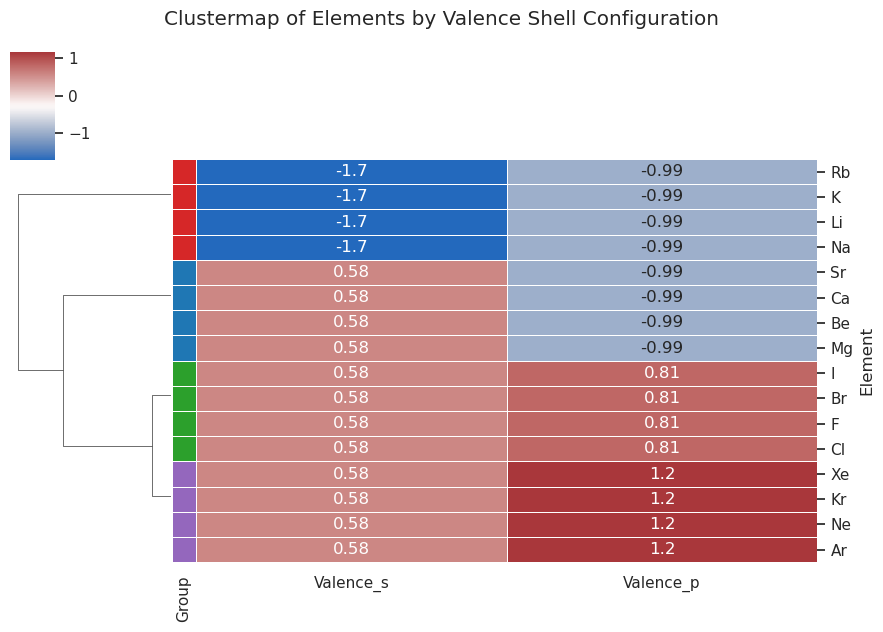

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Define simplified chemistry dataset with Xenon replacing Helium
data = {
    "Element": [
        "Li", "Na", "K", "Rb",             # Alkali metals
        "Be", "Mg", "Ca", "Sr",            # Alkaline earth metals
        "F", "Cl", "Br", "I",              # Halogens
        "Ne", "Ar", "Kr", "Xe"             # Noble gases
    ],
    "Group": [
        "Alkali", "Alkali", "Alkali", "Alkali",
        "AlkalineEarth", "AlkalineEarth", "AlkalineEarth", "AlkalineEarth",
        "Halogen", "Halogen", "Halogen", "Halogen",
        "NobleGas", "NobleGas", "NobleGas", "NobleGas"
    ],
    "Valence_s": [
        1, 1, 1, 1,
        2, 2, 2, 2,
        2, 2, 2, 2,
        2, 2, 2, 2
    ],
    "Valence_p": [
        0, 0, 0, 0,
        0, 0, 0, 0,
        5, 5, 5, 5,
        6, 6, 6, 6
    ]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)
df.set_index("Element", inplace=True)

# Step 3: Extract features and standardize
features = df[["Valence_s", "Valence_p"]]
scaled = StandardScaler().fit_transform(features)
scaled_df = pd.DataFrame(scaled, index=features.index, columns=features.columns)

# Step 4: Create color map for row labels
group_colors = {
    "Alkali": "#d62728",         # red
    "AlkalineEarth": "#1f77b4",  # blue
    "Halogen": "#2ca02c",        # green
    "NobleGas": "#9467bd"        # purple
}
row_colors = df["Group"].map(group_colors)

# Step 5: Create clustermap with row colors
sns.clustermap(
    scaled_df,
    cmap="vlag",
    annot=True,
    figsize=(9, 6),
    linewidths=0.5,
    row_cluster=True,
    col_cluster=False,
    row_colors=row_colors
)

plt.suptitle("Clustermap of Elements by Valence Shell Configuration", y=1.05)
plt.show()


In [9]:
import numpy as np

data = [
    1, 1, 1, 1,
    2, 2, 2, 2,
    2, 2, 2, 2,
    2, 2, 2, 2
]

std_dev = np.std(data)
print("Standard Deviation:", std_dev)
mean = np.mean(data)
print("Mean:", mean)
print(f"z-score for valence_s alkali metal: {(1-mean)/std_dev:.2f}")
print(f"z-score for valence_s all others: {(2-mean)/std_dev:.2f}")

Standard Deviation: 0.4330127018922193
Mean: 1.75
z-score for valence_s alkali metal: -1.73
z-score for valence_s all others: 0.58


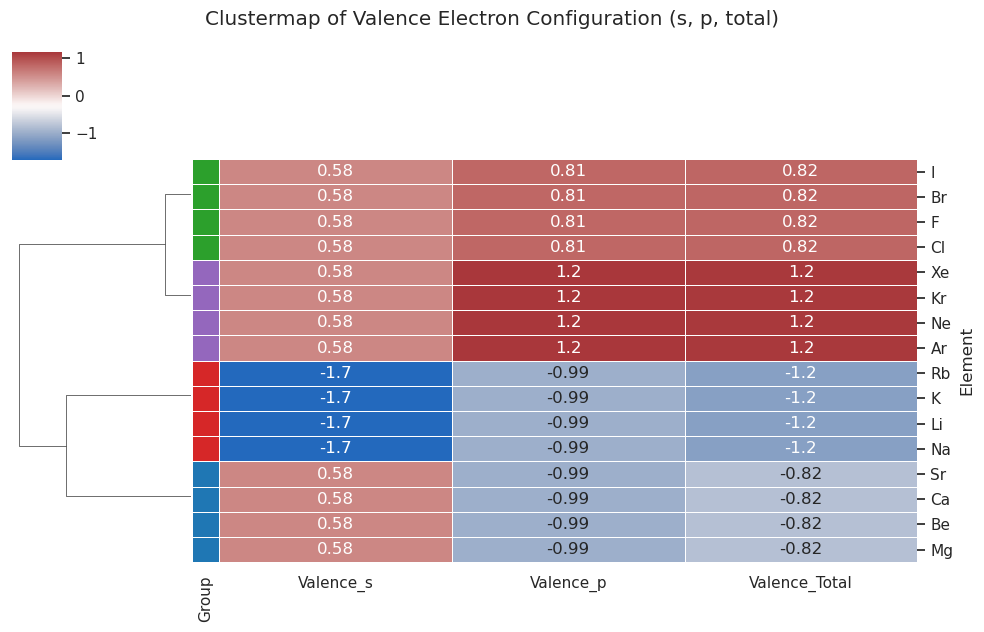

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Step 1: Define dataset with valence features
data = {
    "Element": [
        "Li", "Na", "K", "Rb",             # Alkali metals
        "Be", "Mg", "Ca", "Sr",            # Alkaline earth metals
        "F", "Cl", "Br", "I",              # Halogens
        "Ne", "Ar", "Kr", "Xe"             # Noble gases
    ],
    "Group": [
        "Alkali", "Alkali", "Alkali", "Alkali",
        "AlkalineEarth", "AlkalineEarth", "AlkalineEarth", "AlkalineEarth",
        "Halogen", "Halogen", "Halogen", "Halogen",
        "NobleGas", "NobleGas", "NobleGas", "NobleGas"
    ],
    "Valence_s": [
        1, 1, 1, 1,
        2, 2, 2, 2,
        2, 2, 2, 2,
        2, 2, 2, 2
    ],
    "Valence_p": [
        0, 0, 0, 0,
        0, 0, 0, 0,
        5, 5, 5, 5,
        6, 6, 6, 6
    ]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)
df.set_index("Element", inplace=True)

# Step 3: Add combined valence total
df["Valence_Total"] = df["Valence_s"] + df["Valence_p"]

# Step 4: Standardize all three features
features = df[["Valence_s", "Valence_p", "Valence_Total"]]
scaled = StandardScaler().fit_transform(features)
scaled_df = pd.DataFrame(scaled, index=features.index, columns=features.columns)

# Step 5: Map groups to colors for visual labeling
group_colors = {
    "Alkali": "#d62728",         # red
    "AlkalineEarth": "#1f77b4",  # blue
    "Halogen": "#2ca02c",        # green
    "NobleGas": "#9467bd"        # purple
}
row_colors = df["Group"].map(group_colors)

# Step 6: Create clustermap
sns.clustermap(
    scaled_df,
    cmap="vlag",
    annot=True,
    figsize=(10, 6),
    linewidths=0.5,
    row_cluster=True,
    col_cluster=False,
    row_colors=row_colors
)

plt.suptitle("Clustermap of Valence Electron Configuration (s, p, total)", y=1.05)
plt.show()



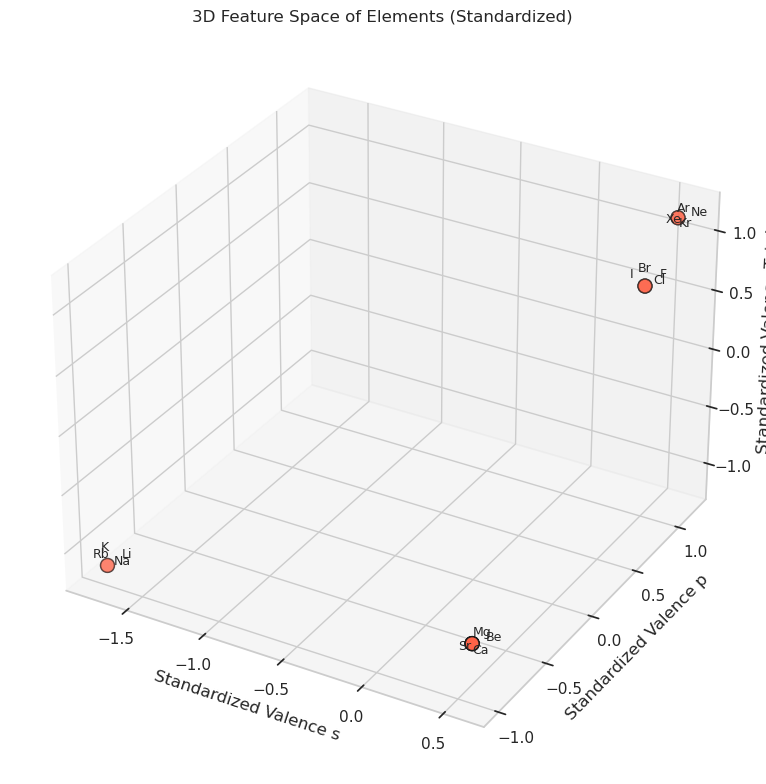

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

# Step 1: Define simplified valence electron dataset
data = {
    "Element": [
        "Li", "Na", "K", "Rb",             # Alkali metals
        "Be", "Mg", "Ca", "Sr",            # Alkaline earth metals
        "F", "Cl", "Br", "I",              # Halogens
        "Ne", "Ar", "Kr", "Xe"             # Noble gases
    ],
    "Group": [
        "Alkali", "Alkali", "Alkali", "Alkali",
        "AlkalineEarth", "AlkalineEarth", "AlkalineEarth", "AlkalineEarth",
        "Halogen", "Halogen", "Halogen", "Halogen",
        "NobleGas", "NobleGas", "NobleGas", "NobleGas"
    ],
    "Valence_s": [
        1, 1, 1, 1,
        2, 2, 2, 2,
        2, 2, 2, 2,
        2, 2, 2, 2
    ],
    "Valence_p": [
        0, 0, 0, 0,
        0, 0, 0, 0,
        5, 5, 5, 5,
        6, 6, 6, 6
    ]
}

# Step 2: Create DataFrame and compute valence total
df = pd.DataFrame(data)
df.set_index("Element", inplace=True)
df["Valence_Total"] = df["Valence_s"] + df["Valence_p"]

# Step 3: Standardize the features
features = df[["Valence_s", "Valence_p", "Valence_Total"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled, index=df.index, columns=features.columns)

# Step 4: Create 3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Extract standardized coordinates
x = scaled_df["Valence_s"]
y = scaled_df["Valence_p"]
z = scaled_df["Valence_Total"]

# Plot the points
ax.scatter(x, y, z, s=100, c="tomato", edgecolor="k")

# Annotate each element
# Smarter label offsetting to reduce overlap
offsets = [
    (0.07, 0.04, 0.04),
    (0.07, -0.04, 0.04),
    (-0.07, 0.04, 0.04),
    (-0.07, -0.04, 0.04),
    (0.04, 0.07, -0.04),
    (-0.04, 0.07, -0.04),
    (0.04, -0.07, -0.04),
    (-0.04, -0.07, -0.04),
] * 2  # Extend if needed

for (element, xs, ys, zs), (dx, dy, dz) in zip(scaled_df.itertuples(), offsets):
    ax.text(xs + dx, ys + dy, zs + dz, element, fontsize=9, ha='left', va='bottom')


# Axis labels
ax.set_xlabel("Standardized Valence s")
ax.set_ylabel("Standardized Valence p")
ax.set_zlabel("Standardized Valence Total")
ax.set_title("3D Feature Space of Elements (Standardized)")

plt.tight_layout()
plt.show()


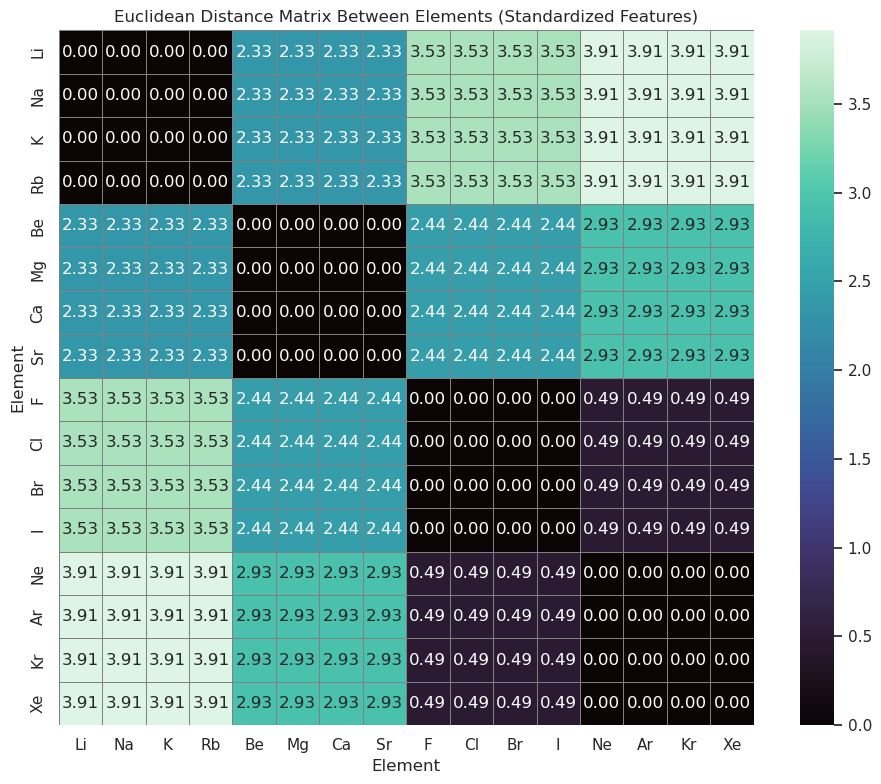

In [12]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import pdist, squareform

# Step 1: Define simplified chemistry dataset (replacing He with Xe)
data = {
    "Element": [
        "Li", "Na", "K", "Rb",             # Alkali metals
        "Be", "Mg", "Ca", "Sr",            # Alkaline earth metals
        "F", "Cl", "Br", "I",              # Halogens
        "Ne", "Ar", "Kr", "Xe"             # Noble gases
    ],
    "Group": [
        "Alkali", "Alkali", "Alkali", "Alkali",
        "AlkalineEarth", "AlkalineEarth", "AlkalineEarth", "AlkalineEarth",
        "Halogen", "Halogen", "Halogen", "Halogen",
        "NobleGas", "NobleGas", "NobleGas", "NobleGas"
    ],
    "Valence_s": [
        1, 1, 1, 1,
        2, 2, 2, 2,
        2, 2, 2, 2,
        2, 2, 2, 2
    ],
    "Valence_p": [
        0, 0, 0, 0,
        0, 0, 0, 0,
        5, 5, 5, 5,
        6, 6, 6, 6
    ]
}

# Step 2: Create DataFrame
df = pd.DataFrame(data)
df.set_index("Element", inplace=True)

# Step 3: Add combined valence column
df["Valence_Total"] = df["Valence_s"] + df["Valence_p"]

# Step 4: Standardize features
features = df[["Valence_s", "Valence_p", "Valence_Total"]]
scaler = StandardScaler()
scaled = scaler.fit_transform(features)
scaled_df = pd.DataFrame(scaled, index=df.index, columns=features.columns)

# Step 5: Compute pairwise Euclidean distances
dist_matrix = squareform(pdist(scaled_df, metric="euclidean"))
dist_df = pd.DataFrame(dist_matrix, index=scaled_df.index, columns=scaled_df.index)

# Step 6: Plot the distance matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(dist_df, cmap="mako", annot=True, fmt=".2f", square=True, linewidths=0.5, linecolor='gray')

plt.title("Euclidean Distance Matrix Between Elements (Standardized Features)")
plt.xlabel("Element")
plt.ylabel("Element")
plt.tight_layout()
plt.show()


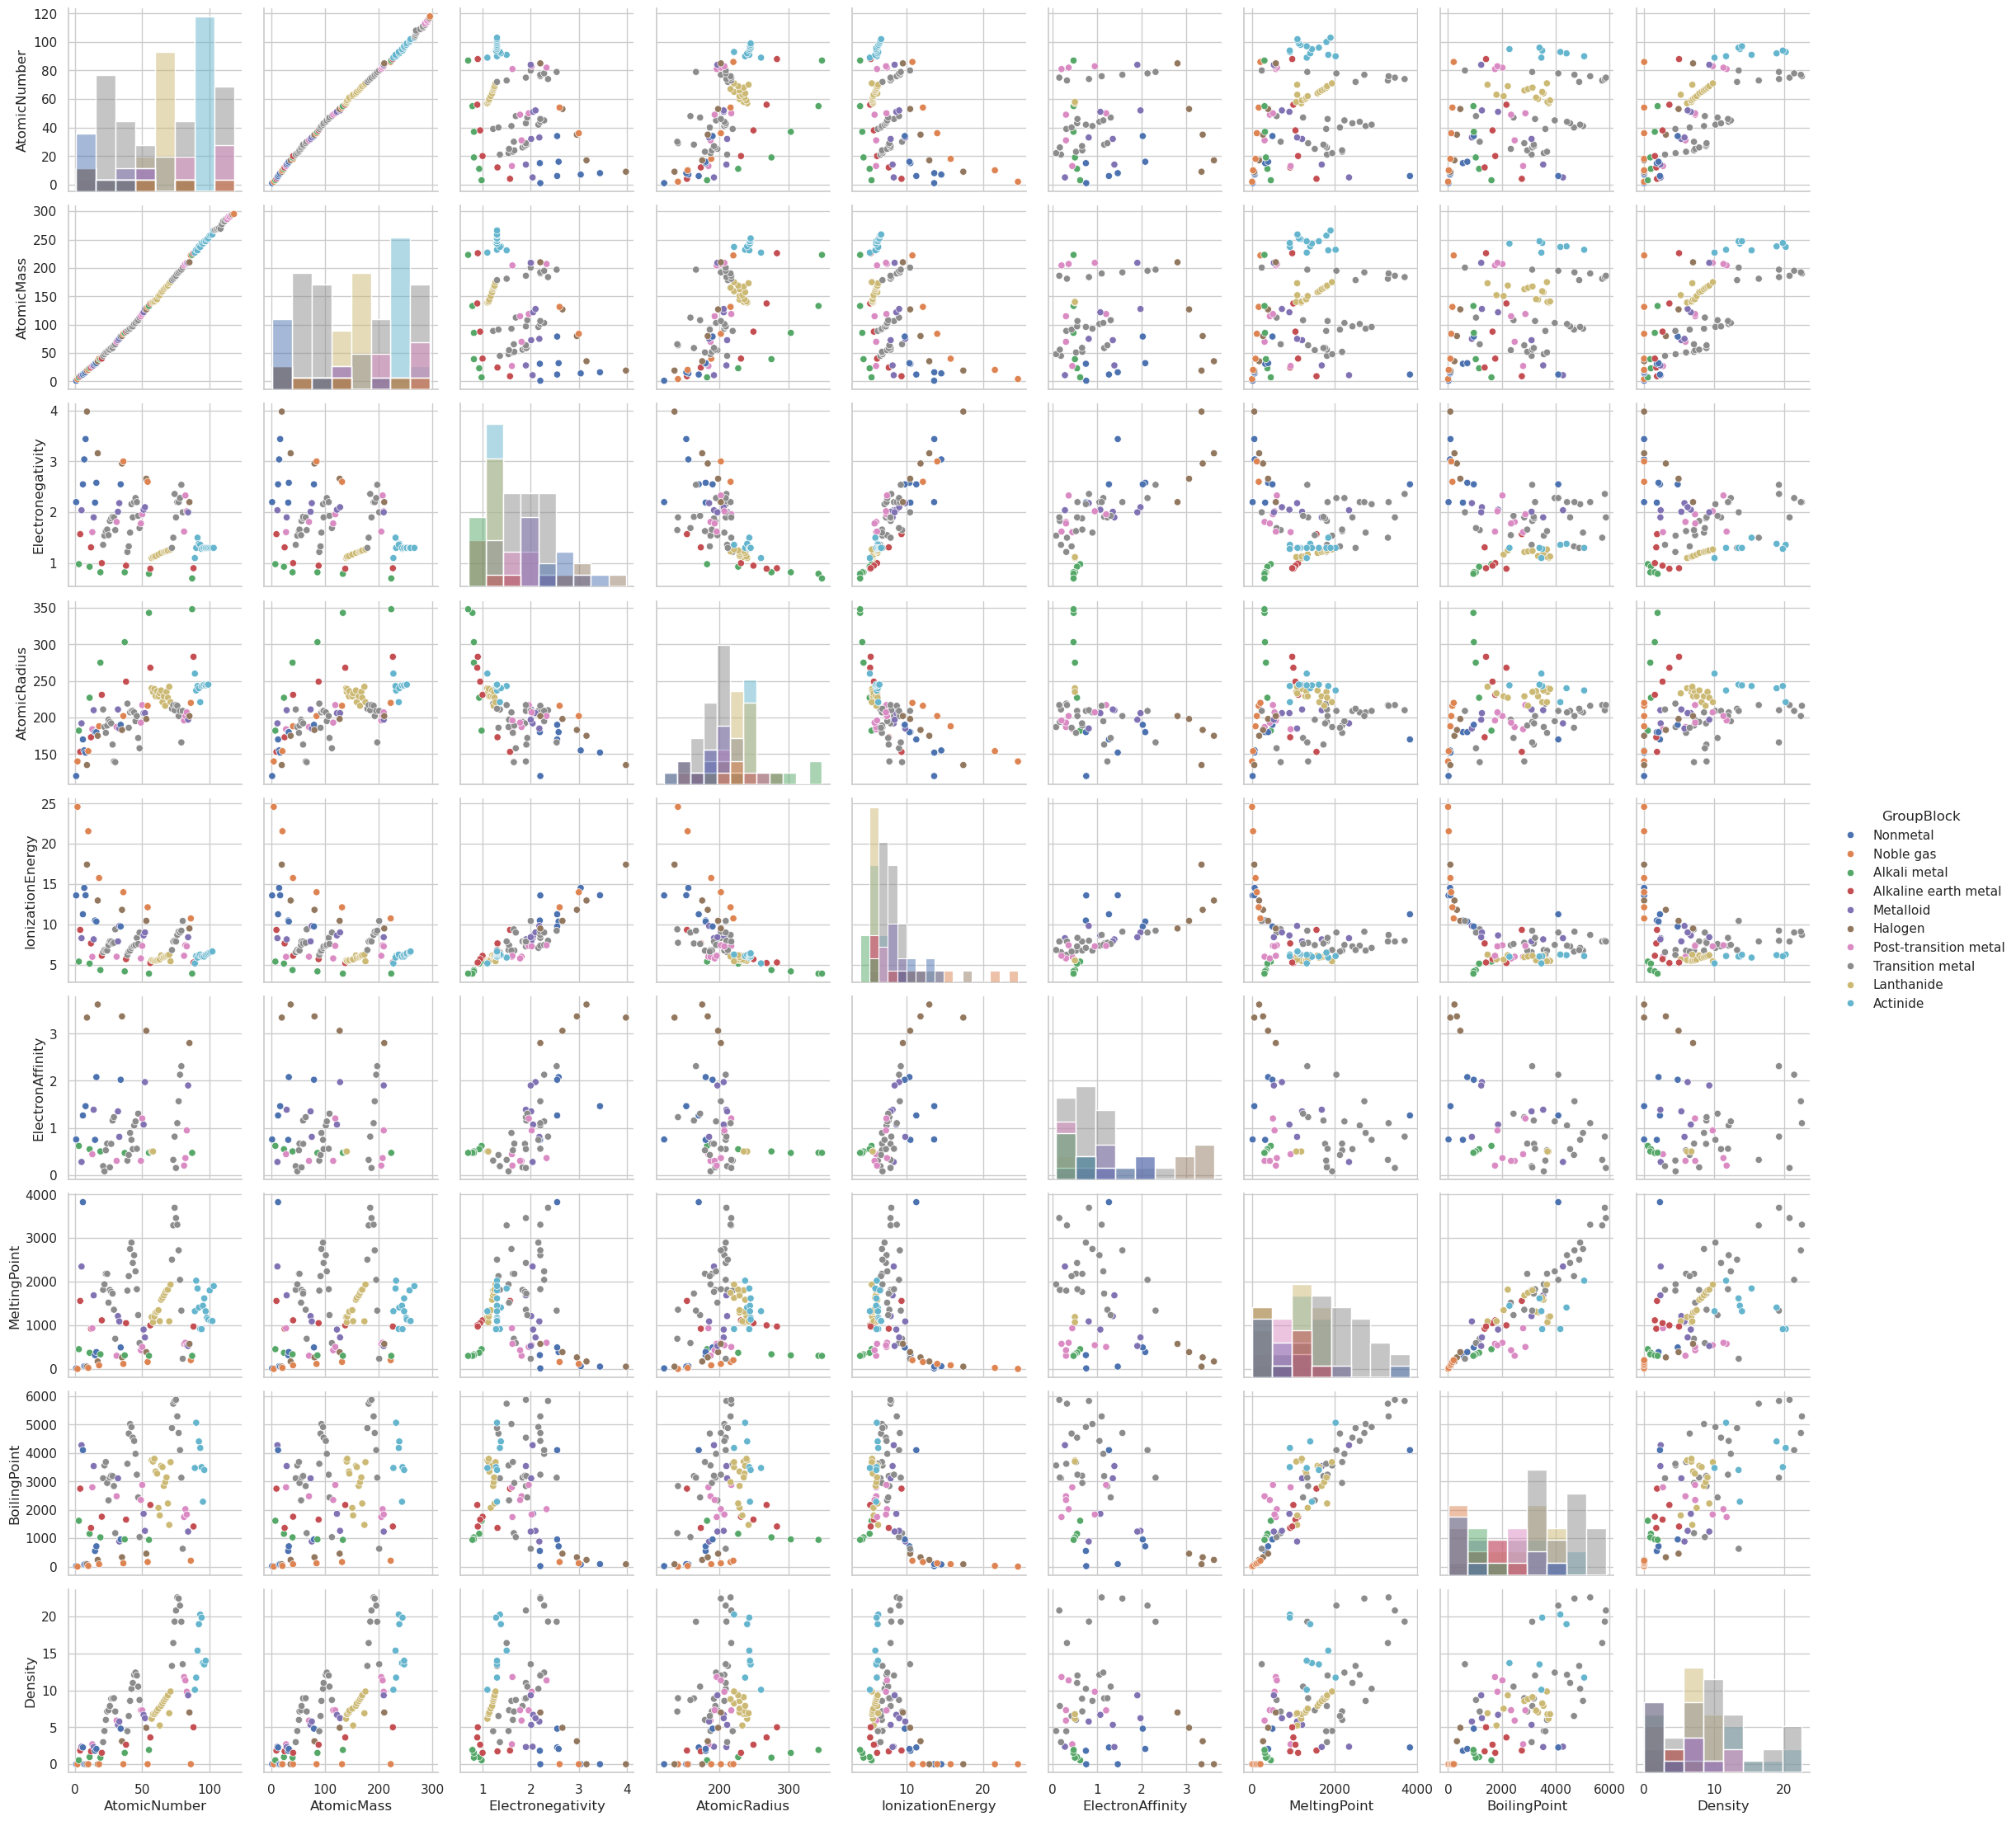

In [13]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
df.head()

sns.pairplot(data=df, hue='GroupBlock', diag_kind='hist')
plt.show()

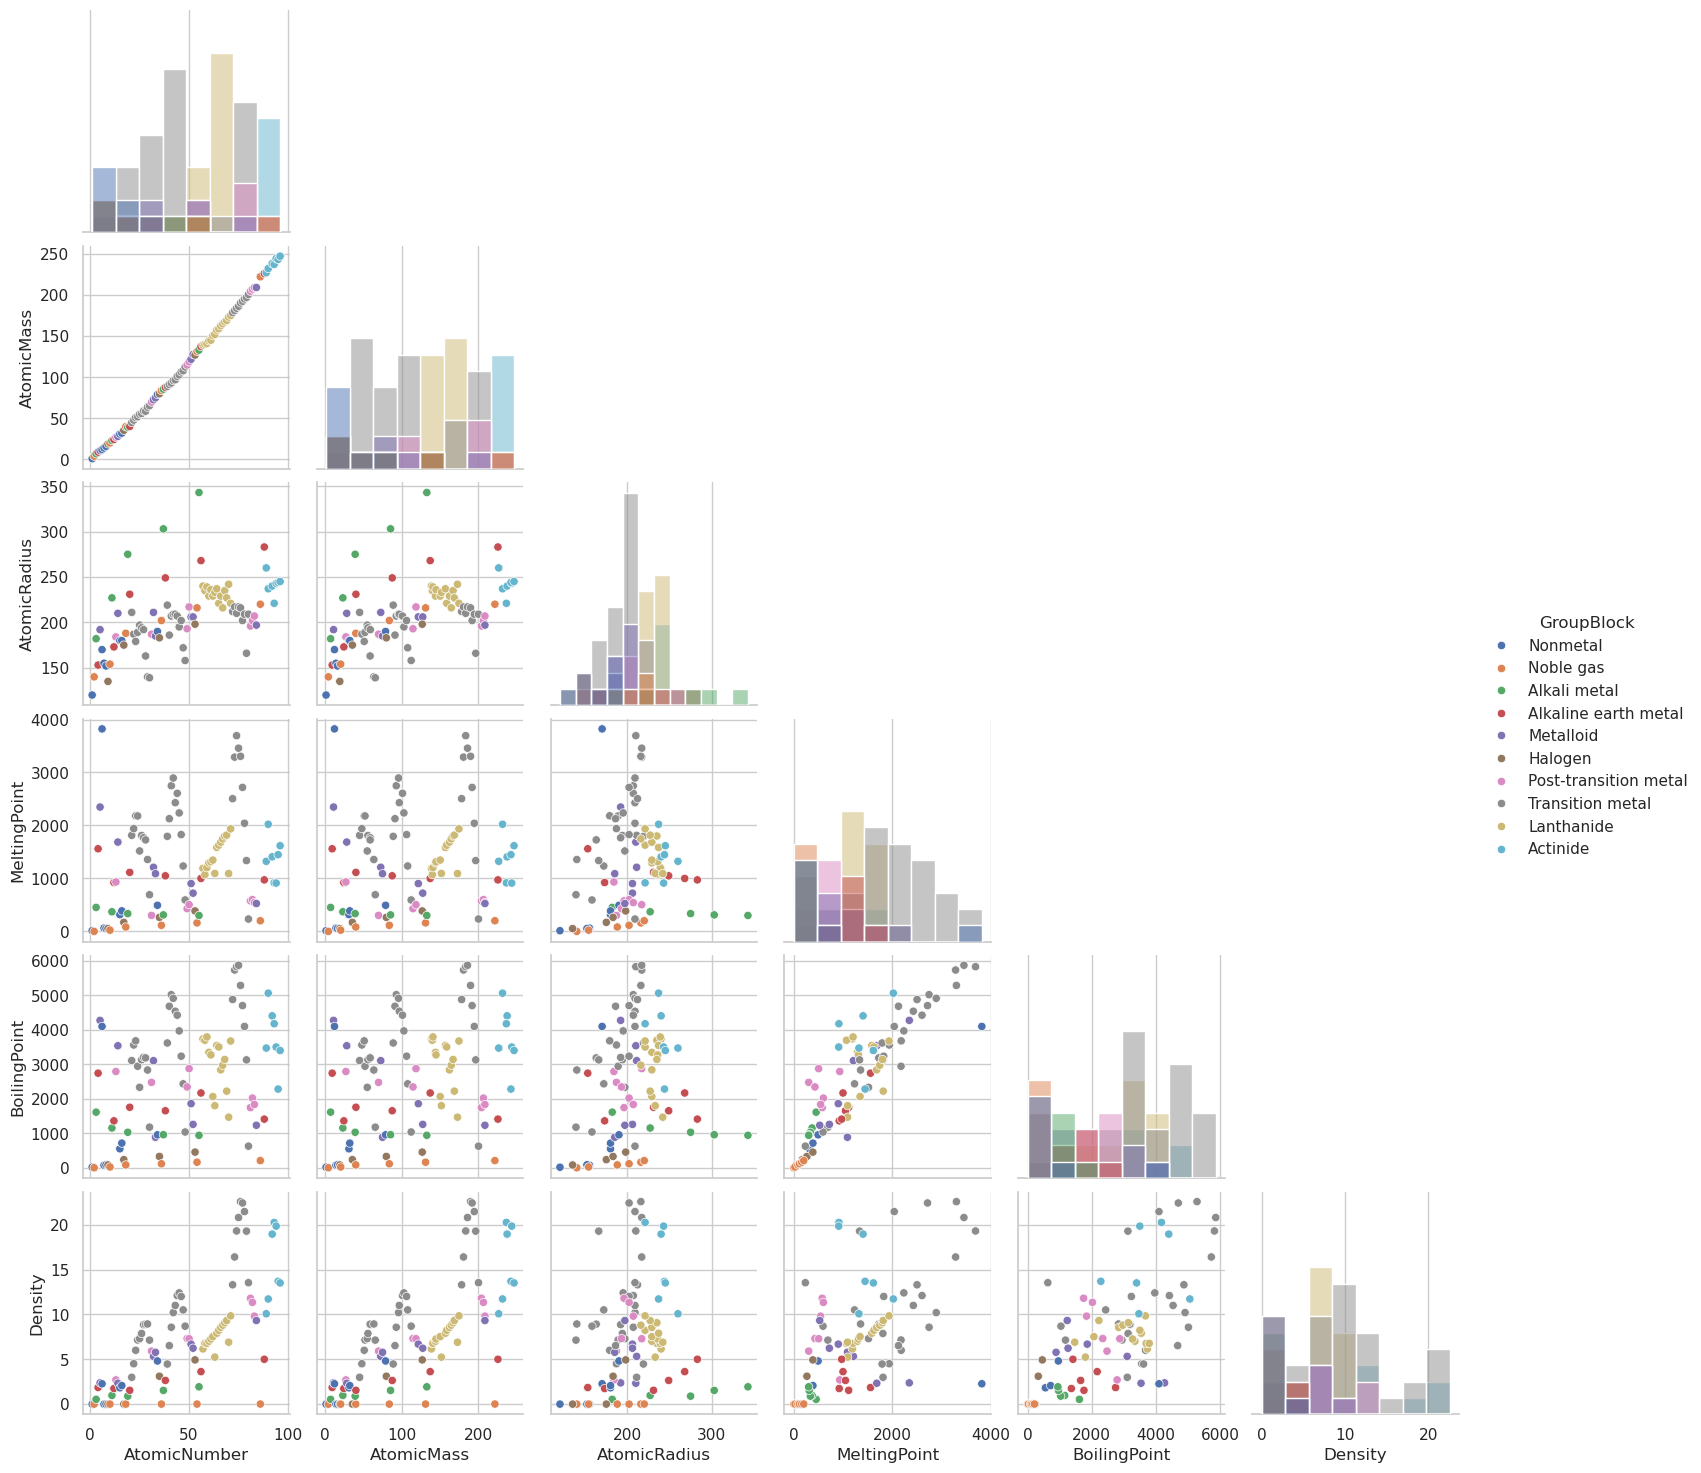

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

# Make sure you select only the relevant columns + 'GroupBlock'
selected_columns = [
    'AtomicNumber', 'AtomicMass', 'AtomicRadius', 'MeltingPoint', 
    'BoilingPoint', 'Density', 'GroupBlock'
]

# Subset the DataFrame
df_subset = df[selected_columns].dropna()  # drop rows with missing data

# Create the pairplot
sns.pairplot(df_subset, hue='GroupBlock', diag_kind='hist', corner=True)

# Show the plot
plt.show()


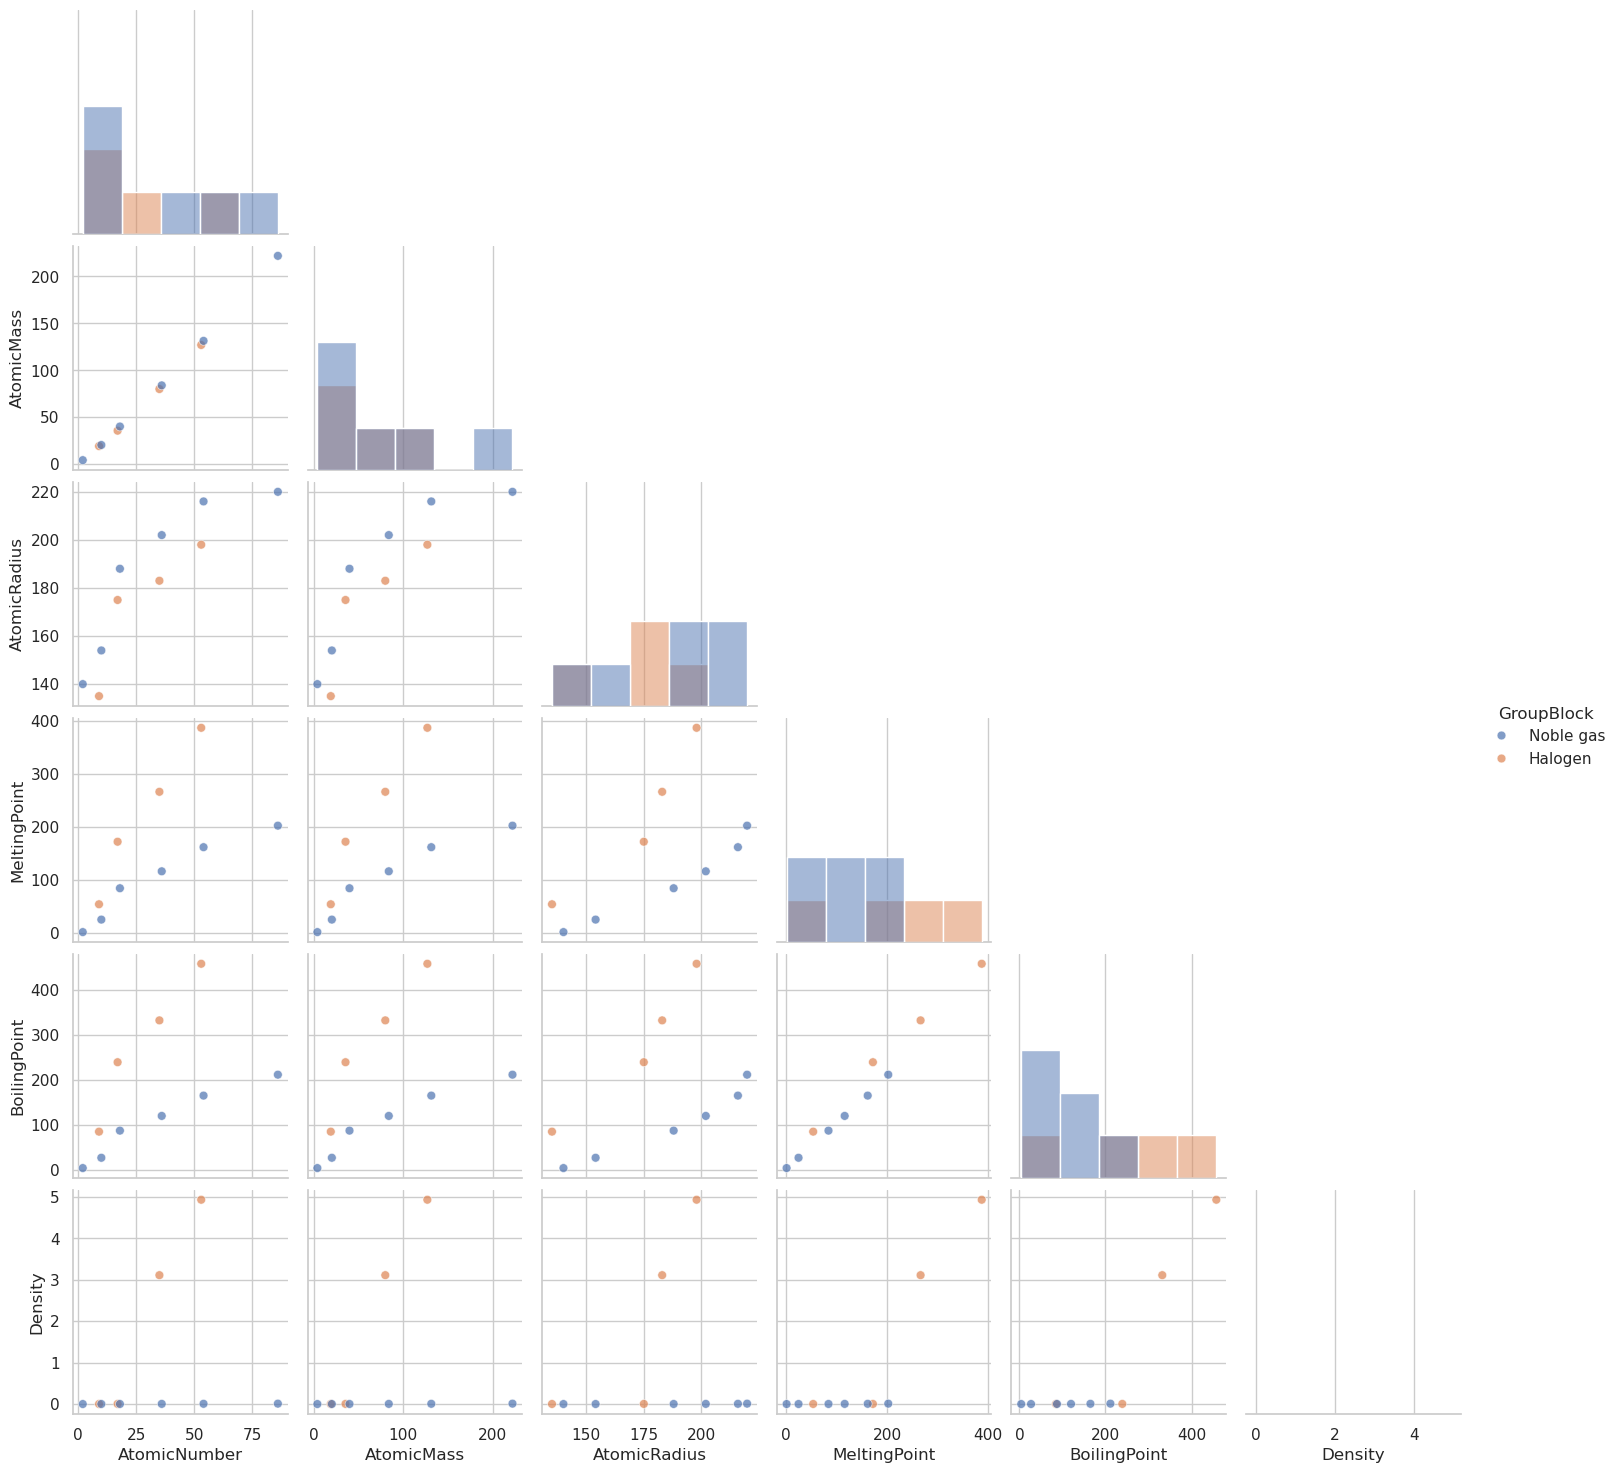

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# List the numeric columns and 'GroupBlock'
selected_columns = [
    'AtomicNumber', 'AtomicMass', 'AtomicRadius', 'MeltingPoint', 
    'BoilingPoint', 'Density', 'GroupBlock'
]

# Subset the DataFrame and filter only halogens and noble gases
df_filtered = df[selected_columns].dropna()
df_filtered = df_filtered[df_filtered['GroupBlock'].isin(['Halogen', 'Noble gas'])]

# Create the pairplot
sns.pairplot(
    df_filtered,
    hue='GroupBlock',
    diag_kind='hist',
    corner=True,
    plot_kws={'alpha': 0.7, 's': 40}
)

# Show the plot
plt.show()


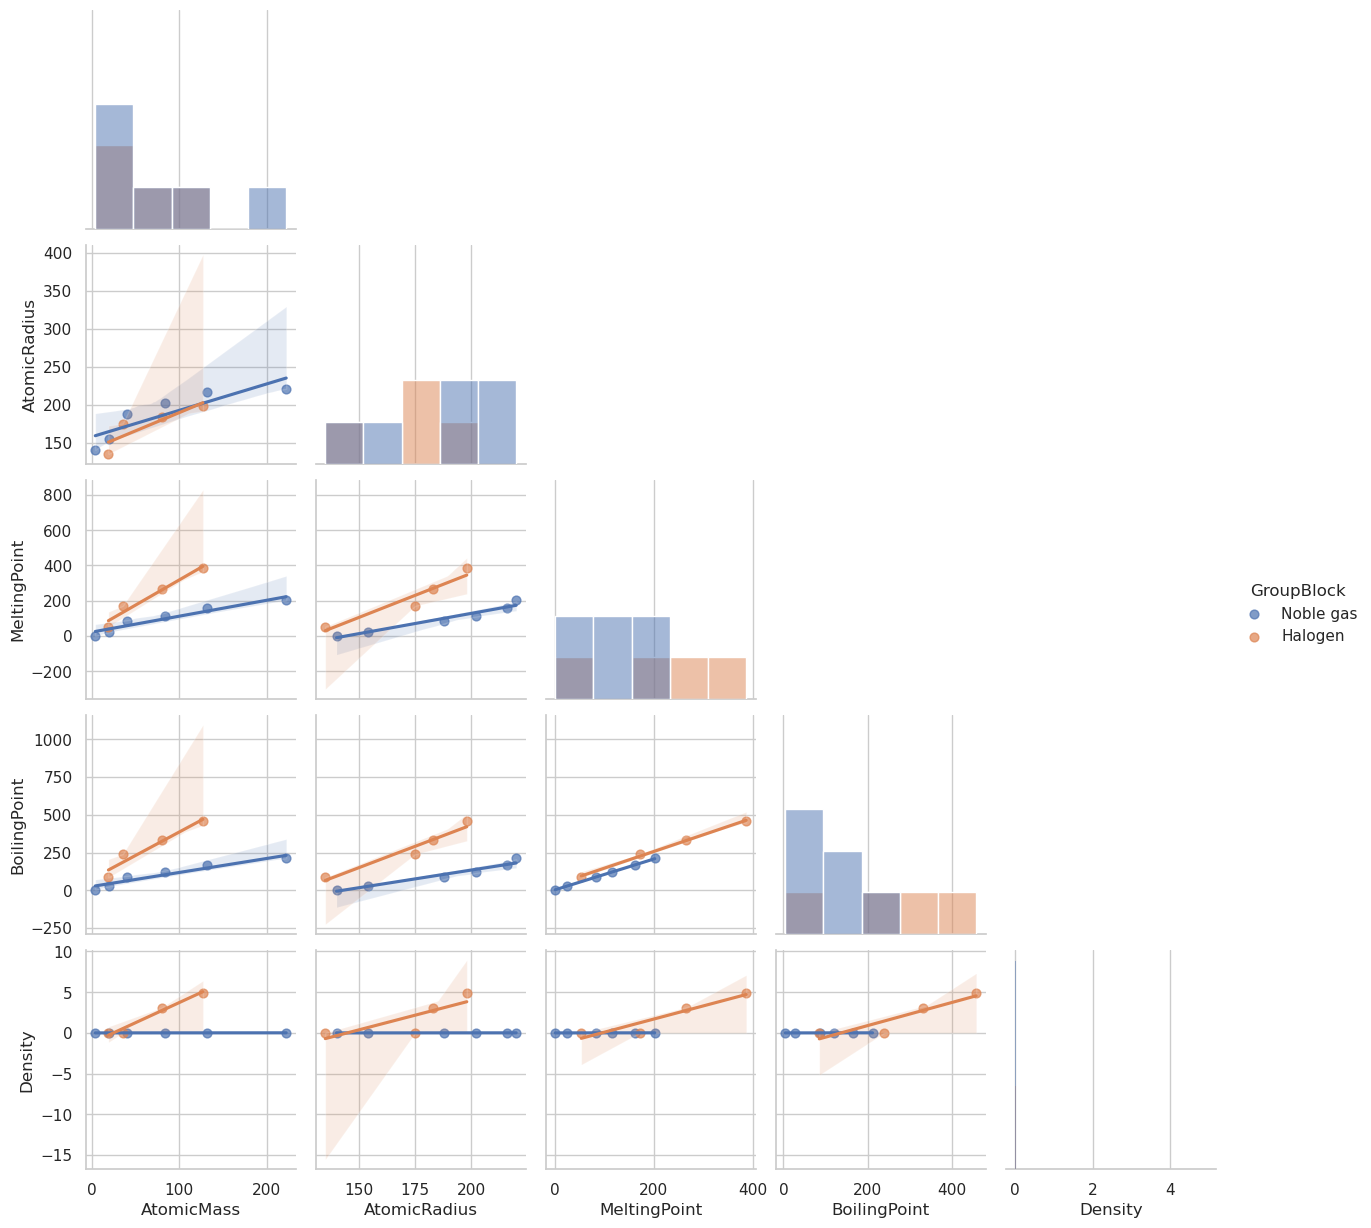

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select and filter your data
selected_columns = [
    'AtomicMass', 'AtomicRadius', 'MeltingPoint', 
    'BoilingPoint', 'Density', 'GroupBlock'
]

df_filtered = df[selected_columns].dropna()
df_filtered = df_filtered[df_filtered['GroupBlock'].isin(['Halogen', 'Noble gas'])]

# Create pairplot with regression lines
sns.pairplot(
    df_filtered,
    hue='GroupBlock',
    kind='reg',              # <-- this adds regression fits
    diag_kind='hist',
    corner=True,
    plot_kws={'scatter_kws': {'alpha': 0.7, 's': 40}}  # control point appearance
)

plt.show()


        AtomicNumber       Name  AtomicMass CPKHexColor ElectronConfiguration  \
Symbol                                                                          
H                  1   Hydrogen    1.008000      FFFFFF                   1s1   
He                 2     Helium    4.002600      D9FFFF                   1s2   
Li                 3    Lithium    7.000000      CC80FF               [He]2s1   
Be                 4  Beryllium    9.012183      C2FF00               [He]2s2   
B                  5      Boron   10.810000      FFB5B5           [He]2s2 2p1   

        Electronegativity  AtomicRadius  IonizationEnergy  ElectronAffinity  \
Symbol                                                                        
H                    2.20         120.0            13.598             0.754   
He                    NaN         140.0            24.587               NaN   
Li                   0.98         182.0             5.392             0.618   
Be                   1.57         153

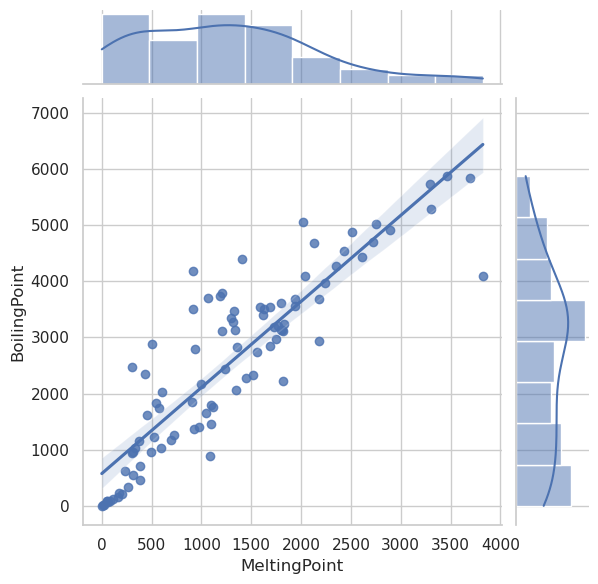

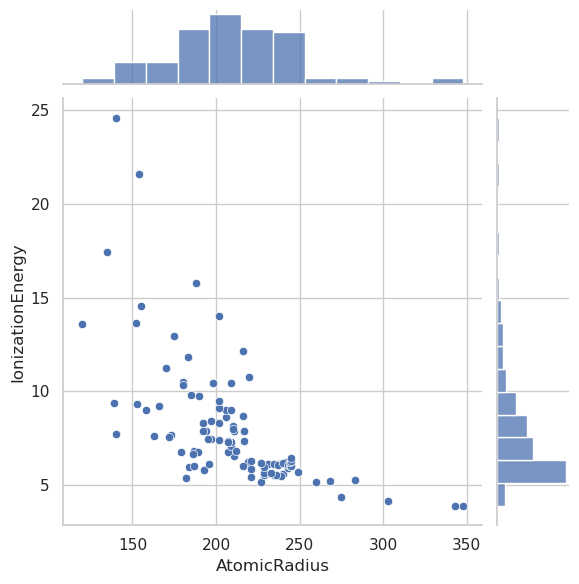

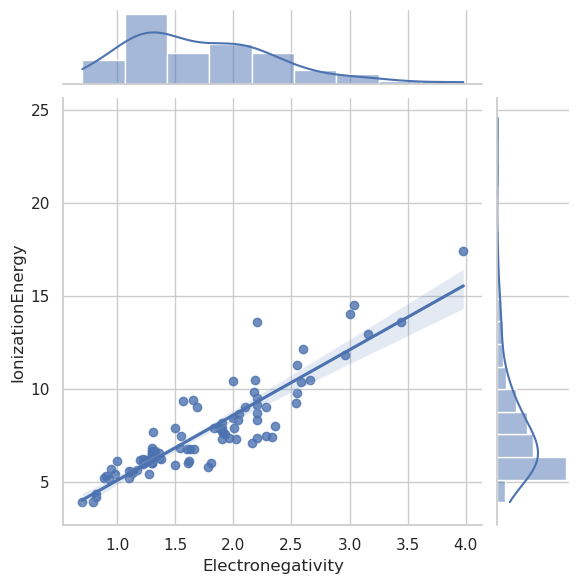

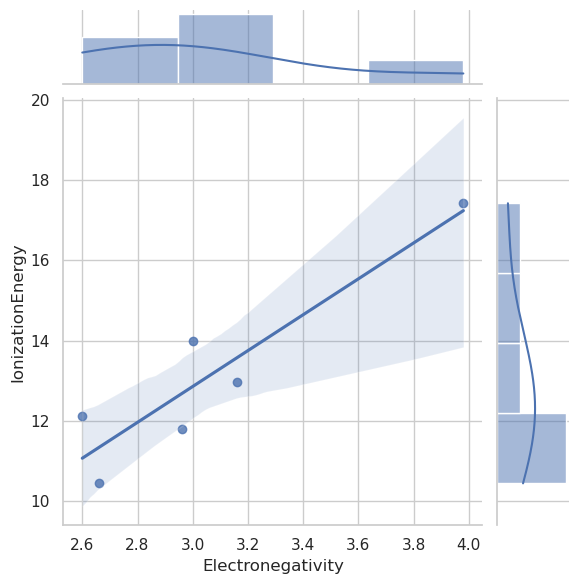

In [17]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

base_data_dir = os.path.expanduser("~/data")  # Parent directory
pubchem_data_dir = os.path.join(base_data_dir, "pubchem_data")  # Subdirectory for PubChem
os.makedirs(pubchem_data_dir, exist_ok=True)  # Ensure directories exist
periodictable_csv_datapath = os.path.join(pubchem_data_dir, "PubChemElements_all.csv")
df = pd.read_csv(periodictable_csv_datapath, index_col=1)
print(df.head())

# Select and filter your data
selected_columns = [
    'AtomicMass', 'AtomicRadius', 'MeltingPoint', 'IonizationEnergy', 
    'BoilingPoint', 'Density', 'GroupBlock', 'Electronegativity'
]

df_filtered = df[selected_columns].dropna()
df_filtered = df_filtered[df_filtered['GroupBlock'].isin(['Halogen', 'Noble gas'])]

sns.jointplot(data=df, x="MeltingPoint", y="BoilingPoint", kind="reg")
sns.jointplot(data=df, x="AtomicRadius", y="IonizationEnergy", kind="scatter")
sns.jointplot(data=df, x="Electronegativity", y="IonizationEnergy", kind="reg")
sns.jointplot(data=df_filtered, x="Electronegativity", y="IonizationEnergy", kind="reg")
plt.show()

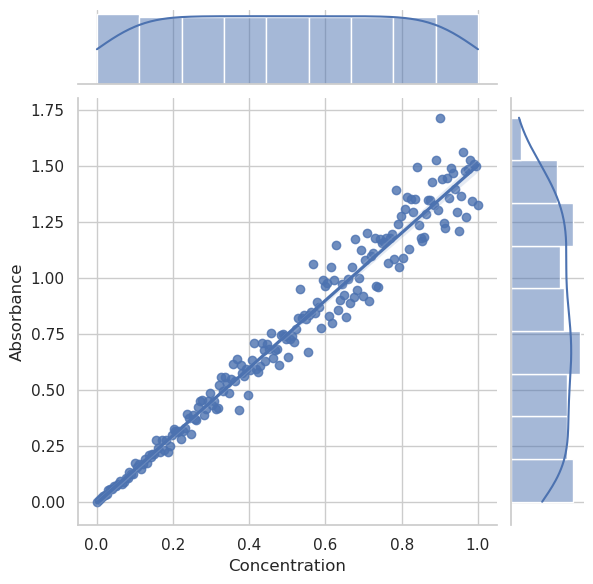

In [18]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Simulate concentration and absorbance with increasing variance
np.random.seed(42)
concentration = np.linspace(0.001, 1.0, 200)
absorbance = 1.5 * concentration + np.random.normal(0, 0.15 * concentration, size=200)
#
#absorbance = 1.5 * concentration + np.random.normal(0, 0.15 * np.exp(concentration))

df = pd.DataFrame({
    "Concentration": concentration,
    "Absorbance": absorbance
})


sns.jointplot(data=df, x="Concentration", y="Absorbance", kind="reg")
plt.show()
